# **Project - Using Python - 40673**





Firstly, I started importing the main significant libraries that will be used afterwards.


In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import sklearn as sk
import warnings
import keras
import os
from numpy import save
from keras.models import load_model
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import sequence
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GRU

## setting seaborn graphs to a better style
sns.set(style="ticks")

## setting the graphs to show in the jupyter notebook
%matplotlib inline

Using additional unzip code in order to unzip "train" folder with images into my directory in Google Colabs

In [ ]:
!unzip train.zip

Using "listdir" function, I forced to take whole images from "train" folder, then present 5 of them.

In [137]:
img_dir = r'/content/train'
images = os.listdir(img_dir)
images[:5]

['dog.636.jpg', 'cat.542.jpg', 'cat.982.jpg', 'dog.295.jpg', 'cat.501.jpg']

Getting all cat/dog images into jupyter file and calling with full_images, then present 5 of them below.

In [138]:
full_images = [os.path.join(img_dir, img) for img in images]
full_images[:5]

['/content/train/dog.636.jpg',
 '/content/train/cat.542.jpg',
 '/content/train/cat.982.jpg',
 '/content/train/dog.295.jpg',
 '/content/train/cat.501.jpg']

I decreased amount of cat and dog images from kaggle dataset, I set up 1000 cat and 1000 dog images in order to analyze efficiently and as soon as possible.

Next, I imported "load_images" function from "imports_for_ML" file from my directory. Then, using this function, I select images from directory, then selecting 2000 of them, with resize 50/50.

In [7]:
from imports_for_ML import load_images
X, y = load_images(img_dir, n_images=2000, resize=(50, 50))

**************************************************
**************************************************


Getting the shape of X. As you can see, we have 2000 images for analysis.

In [8]:
X.shape

(2000, 50, 50, 3)

In the main part, I splitted dataset into train and test parts. I set test_size with 20% while random_state will be 0.

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Presenting X_train

In [140]:
X_train

array([[[[105., 105., 107.],
         [113., 113., 115.],
         [109., 109., 111.],
         ...,
         [ 57.,  21.,   7.],
         [ 58.,  23.,   4.],
         [ 58.,  23.,   4.]],

        [[ 98.,  98., 100.],
         [102., 102., 104.],
         [100., 100., 102.],
         ...,
         [ 54.,  18.,   2.],
         [ 57.,  22.,   2.],
         [ 58.,  23.,   3.]],

        [[108., 108., 110.],
         [104., 104., 106.],
         [116., 116., 118.],
         ...,
         [ 58.,  23.,   3.],
         [ 60.,  25.,   3.],
         [ 64.,  29.,   7.]],

        ...,

        [[ 77.,  82.,  85.],
         [ 97., 101., 104.],
         [ 81.,  82.,  86.],
         ...,
         [170., 161., 164.],
         [162., 153., 156.],
         [162., 153., 156.]],

        [[ 93.,  92.,  98.],
         [ 94.,  93.,  99.],
         [ 92.,  87.,  94.],
         ...,
         [158., 149., 152.],
         [148., 139., 142.],
         [132., 123., 126.]],

        [[ 94.,  94.,  96.],
       

Presenting X_test

In [141]:
X_test

array([[[[111., 109.,  88.],
         [115., 113.,  92.],
         [116., 114.,  91.],
         ...,
         [127., 122., 103.],
         [123., 120., 103.],
         [121., 118., 101.]],

        [[111., 109.,  88.],
         [116., 114.,  93.],
         [116., 114.,  91.],
         ...,
         [128., 123., 104.],
         [124., 121., 104.],
         [123., 120., 103.]],

        [[113., 111.,  88.],
         [116., 114.,  91.],
         [117., 115.,  92.],
         ...,
         [125., 125., 101.],
         [124., 121., 102.],
         [119., 116.,  97.]],

        ...,

        [[  1.,   1.,   3.],
         [  1.,   1.,   3.],
         [  1.,   1.,   3.],
         ...,
         [ 49.,  59.,  71.],
         [ 21.,  23.,  35.],
         [ 12.,  11.,  17.]],

        [[  1.,   1.,   1.],
         [  1.,   1.,   1.],
         [  2.,   2.,   2.],
         ...,
         [ 18.,  26.,  29.],
         [  9.,  10.,  15.],
         [  1.,   2.,   4.]],

        [[  4.,   4.,   4.],
       

Presenting y_train

In [142]:
y_train

array([0, 0, 1, ..., 1, 0, 0])

Presenting y_test

In [143]:
y_test

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,

The main of the project will be creating my model. So, I created my model with using three Conv2D layers, MaxPooling them, then Flatten and Dense layers. I am getting summary of the model at the end of the code.

In [144]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3))),
model.add(MaxPooling2D((2, 2))),
model.add(Conv2D(64, (3, 3), activation='relu')),
model.add(MaxPooling2D((2, 2))),
model.add(Conv2D(128, (3, 3), activation='relu')),
model.add(MaxPooling2D((2, 2))),
model.add(Flatten()),
model.add(Dense(128, activation='relu')),
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)             

I complied model with using optimizer adam, binary_crossentropy for loss, and other metrics.

Then, I fitted model to dataset with 30 epoches.

In [145]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, validation_split=0.04)

Epoch 1/30
48/48 [==============================] - 6s 113ms/step - loss: 11.3862 - accuracy: 0.5070 - val_loss: 0.7091 - val_accuracy: 0.5000
Epoch 2/30
48/48 [==============================] - 5s 109ms/step - loss: 0.6559 - accuracy: 0.6238 - val_loss: 0.6862 - val_accuracy: 0.5625
Epoch 3/30
48/48 [==============================] - 5s 110ms/step - loss: 0.6015 - accuracy: 0.6672 - val_loss: 0.6528 - val_accuracy: 0.5781
Epoch 4/30
48/48 [==============================] - 5s 109ms/step - loss: 0.5445 - accuracy: 0.7183 - val_loss: 0.6719 - val_accuracy: 0.5312
Epoch 5/30
48/48 [==============================] - 5s 109ms/step - loss: 0.4691 - accuracy: 0.7807 - val_loss: 0.6676 - val_accuracy: 0.5312
Epoch 6/30
48/48 [==============================] - 5s 109ms/step - loss: 0.3815 - accuracy: 0.8499 - val_loss: 0.8123 - val_accuracy: 0.5781
Epoch 7/30
48/48 [==============================] - 5s 110ms/step - loss: 0.3273 - accuracy: 0.8656 - val_loss: 0.7226 - val_accuracy: 0.6406
Epoch

Creating visualization of loss and validation loss in order to clearly understand model

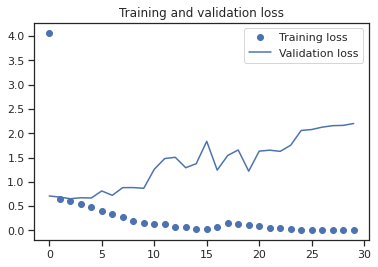

In [194]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

Creating visualization of accuracy and validation accuracy in order to clearly understand the model

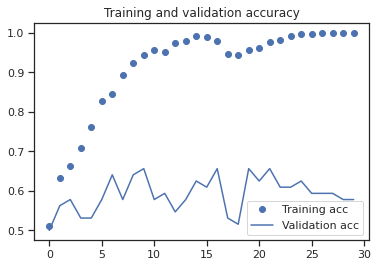

In [195]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

Unfortunately, I can not be able to arrange images side by side with correct and wrong predictions. However, I presented 2 correct predictions with labels, and 2 incorrect predictions with percentages.

First, I select 50 images from dataset and tested my model on them in order to see whether my model will predict cat/dog images correctly or not.

In [146]:
test_sample = X_test[:50]
predictions = model.predict(test_sample)
true_labels = y_test[:50]

First two images are correctly predicted by my model, while the last couple of images are wrongly predicted by model.

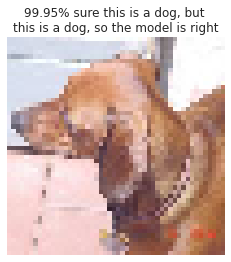

In [192]:
check_idx = 7
plt.imshow(test_sample[check_idx] / 255)
text = '{:.2f}% sure this is a dog, but \nthis is a {}, so the model {}'
correct_response = true_labels[check_idx]
it_is_really = ['cat', 'dog'][correct_response]
net_claims = predictions[check_idx, 0]
is_net_correct = np.abs(net_claims - correct_response) < 0.5
plt.title(text.format(net_claims * 100., it_is_really, ['is wrong', 'is right'][is_net_correct]))
plt.axis('off')

warnings.filterwarnings("ignore", category=DeprecationWarning) 

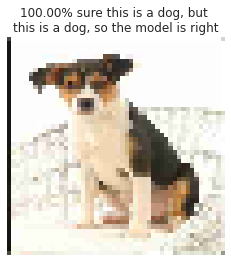

In [191]:
check_idx = 19
plt.imshow(test_sample[check_idx] / 255)
text = '{:.2f}% sure this is a dog, but \nthis is a {}, so the model {}'
correct_response = true_labels[check_idx]
it_is_really = ['cat', 'dog'][correct_response]
net_claims = predictions[check_idx, 0]
is_net_correct = np.abs(net_claims - correct_response) < 0.5
plt.title(text.format(net_claims * 100., it_is_really, ['is wrong', 'is right'][is_net_correct]))
plt.axis('off')

warnings.filterwarnings("ignore", category=DeprecationWarning) 

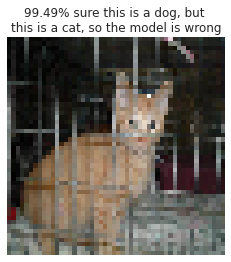

In [190]:
check_idx = 9
plt.imshow(test_sample[check_idx] / 255)
text = '{:.2f}% sure this is a dog, but \nthis is a {}, so the model {}'
correct_response = true_labels[check_idx]
it_is_really = ['cat', 'dog'][correct_response]
net_claims = predictions[check_idx, 0]
is_net_correct = np.abs(net_claims - correct_response) < 0.5
plt.title(text.format(net_claims * 100., it_is_really, ['is wrong', 'is right'][is_net_correct]))
plt.axis('off')

warnings.filterwarnings("ignore", category=DeprecationWarning) 

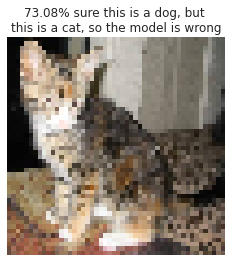

In [193]:
check_idx = 3
plt.imshow(test_sample[check_idx] / 255)
text = '{:.2f}% sure this is a dog, but \nthis is a {}, so the model {}'
correct_response = true_labels[check_idx]
it_is_really = ['cat', 'dog'][correct_response]
net_claims = predictions[check_idx, 0]
is_net_correct = np.abs(net_claims - correct_response) < 0.5
plt.title(text.format(net_claims * 100., it_is_really, ['is wrong', 'is right'][is_net_correct]))
plt.axis('off')

warnings.filterwarnings("ignore", category=DeprecationWarning) 

Evaluating model on test and train datasets

In [200]:
model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 29ms/step - loss: 2.4546 - accuracy: 0.6150


[2.454608917236328, 0.6150000095367432]

Saving model with "h5" format

In [201]:
model.save('/content/final_model/Eldar_Imanov_40673_MODEL.h5')